# WeatherPy

In this data analysis(WeatherPy), we took a closer look at the weather of over 500 cities of varying distances from the equator. We observed the relationships between latitude versus cloudiness, latitude versus humidity, latitude versus temperature, and latitude versus windiness. 
As the latitude approaches 0 or gets closer to the Equator the temperature increases. As the latitude increases and gets farther away from 0 the temperature decreases. In the Northern Hemisphere there is a negative linear relationship latitude versus temperature . In the Southern Hemisphere there is a positive linear relationship Latitude versus Temperature.
Positive linear relationship latitude vs humidity in Northern and Southern Hemisphere.
Positive linear relationship latitude vs cloudiness in Southern and Northern Hemisphere
Negative linear relationship latitude vs wind speed in North and South Hemisphere.


## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["weather"][0]["description"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | nyurba
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | derzhavinsk
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | san felipe
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | silvino lobos
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | dongying
Processing Record 18 of Set 1 | saint anthony
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | mou

Processing Record 40 of Set 4 | poya
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | west bay
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | kapuskasing
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | trelew
Processing Record 48 of Set 4 | atar
Processing Record 49 of Set 4 | mandalgovi
Processing Record 0 of Set 5 | souillac
Processing Record 1 of Set 5 | ludvika
Processing Record 2 of Set 5 | carballo
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | vetluzhskiy
Processing Record 5 of Set 5 | vidim
Processing Record 6 of Set 5 | port hawkesbury
Processing Record 7 of Set 5 | paradwip
City not found. Skipping...
Processing Record 8 of Set 5 | skibbereen
Processing Record 9 of Set 5 | safaqis
City not found. Skipping...
Processing Record 10 of Set 5 | ziyang
Processing Record 11 of Set 5 | khatanga
Processing Record 12 of Set 5 | adelaide
Proce

Processing Record 29 of Set 8 | aljezur
Processing Record 30 of Set 8 | buraydah
Processing Record 31 of Set 8 | ondjiva
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | taksimo
Processing Record 34 of Set 8 | gorodovikovsk
Processing Record 35 of Set 8 | marystown
Processing Record 36 of Set 8 | karabuk
Processing Record 37 of Set 8 | namli
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | de haan
Processing Record 41 of Set 8 | labuan
Processing Record 42 of Set 8 | kerki
City not found. Skipping...
Processing Record 43 of Set 8 | bosobolo
Processing Record 44 of Set 8 | mamallapuram
Processing Record 45 of Set 8 | aksarka
Processing Record 46 of Set 8 | pierre
Processing Record 47 of Set 8 | gamba
Processing Record 48 of Set 8 | miraflores
Processing Record 49 of Set 8 | quesnel
Processing Record 0 of Set 9 | kibala
Processing Record 1 of Set 9 | ladario
Processing Record 2 of Set 9 | yat

Processing Record 17 of Set 12 | antalaha
Processing Record 18 of Set 12 | beipiao
Processing Record 19 of Set 12 | tautira
Processing Record 20 of Set 12 | tuatapere
Processing Record 21 of Set 12 | ilhabela
Processing Record 22 of Set 12 | san clemente
Processing Record 23 of Set 12 | comodoro rivadavia
Processing Record 24 of Set 12 | bucerias
Processing Record 25 of Set 12 | bemidji
Processing Record 26 of Set 12 | havoysund
Processing Record 27 of Set 12 | biak
Processing Record 28 of Set 12 | tianpeng
Processing Record 29 of Set 12 | axim
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | rabo de peixe
Processing Record 32 of Set 12 | yanam
Processing Record 33 of Set 12 | san andres
Processing Record 34 of Set 12 | aasiaat
Processing Record 35 of Set 12 | marquette
Processing Record 36 of Set 12 | buchanan
Processing Record 37 of Set 12 | chicama
Processing Record 38 of Set 12 | mena
Processing Record 39 of Set 12 | ligayan
Processing Record 40 of Set 12 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.7667,114.6000,72.01,78,0,17.27,AU,clear sky
1,nanortalik,60.1432,-45.2371,26.04,83,100,35.79,GL,overcast clouds
2,nyurba,63.2842,118.3319,-49.81,100,62,3.83,RU,broken clouds
3,mar del plata,-38.0023,-57.5575,73.42,91,40,9.22,AR,scattered clouds
4,port lincoln,-34.7333,135.8667,64.51,93,100,8.28,AU,overcast clouds


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,72.01,78,0,17.27,AU,clear sky
1,nanortalik,60.1432,-45.2371,26.04,83,100,35.79,GL,overcast clouds
2,nyurba,63.2842,118.3319,-49.81,100,62,3.83,RU,broken clouds
3,mar del plata,-38.0023,-57.5575,73.42,91,40,9.22,AR,scattered clouds
4,port lincoln,-34.7333,135.8667,64.51,93,100,8.28,AU,overcast clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

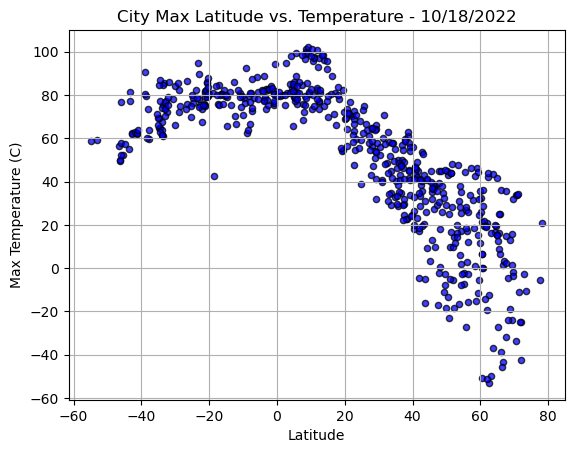

In [17]:
# Create scatter plot for latitude vs temperature.
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature - 10/18/2022')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)
#Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

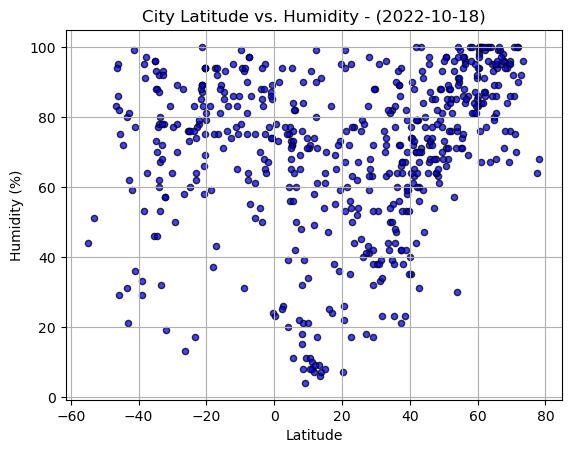

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity - (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

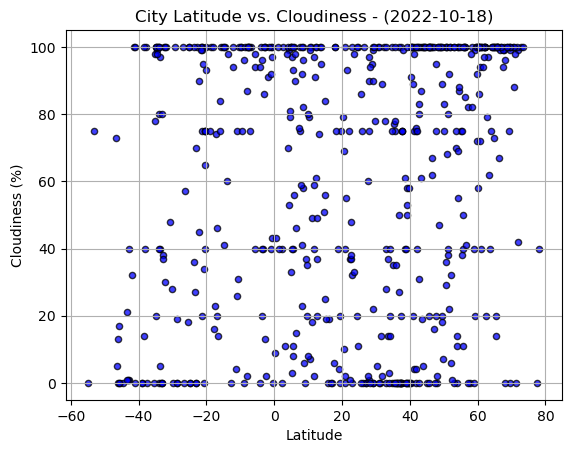

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness - (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

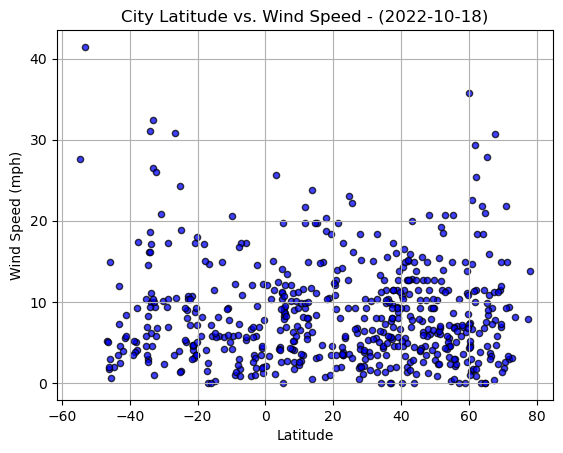

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed - (2022-10-18)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def linear_regression_pl(x_values, y_values, x_label, y_label, coordinates): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = slope * x_values + intercept
    
    line_ex = f"y = {round(slope,2)} x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values,)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_ex, coordinates)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is {rvalue**2}")
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nanortalik,60.1432,-45.2371,26.04,83,100,35.79,GL,overcast clouds
2,nyurba,63.2842,118.3319,-49.81,100,62,3.83,RU,broken clouds
5,derzhavinsk,51.1000,66.3167,9.79,83,100,15.43,KZ,overcast clouds
6,san felipe,10.3399,-68.7425,73.49,71,79,6.55,VE,broken clouds
10,albany,42.6001,-73.9662,38.57,67,80,8.23,US,broken clouds


In [38]:
#Create a DataFrame with the 
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,geraldton,-28.7667,114.6000,72.01,78,0,17.27,AU,clear sky
3,mar del plata,-38.0023,-57.5575,73.42,91,40,9.22,AR,scattered clouds
4,port lincoln,-34.7333,135.8667,64.51,93,100,8.28,AU,overcast clouds
7,rikitea,-23.1203,-134.9692,78.06,74,70,9.04,PF,light rain
8,castro,-24.7911,-50.0119,78.57,60,0,1.52,BR,clear sky


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7285560288200228


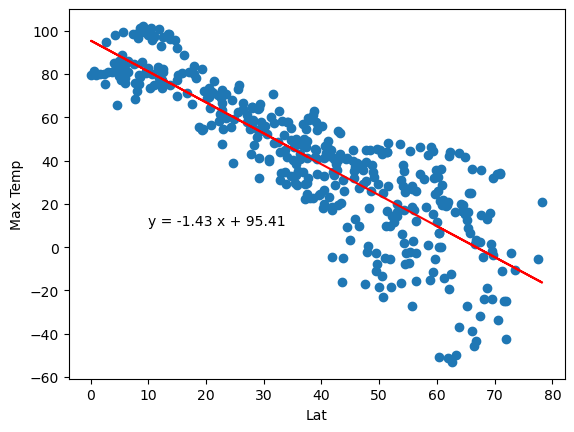

In [39]:
# Linear regression on Northern Hemisphere
linear_regression_pl(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], "Lat","Max Temp", (10,10))

The r-value is 0.2698773165123264


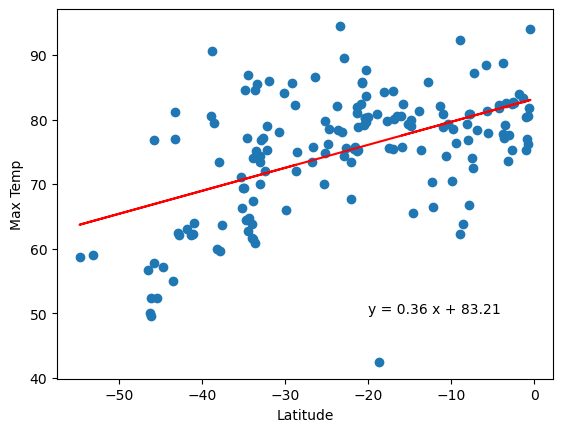

In [51]:
# Linear regression on Southern Hemisphere
linear_regression_pl(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], "Latitude","Max Temp", (-20,50))

**Discussion about the linear relationship: Northern Hemisphere: Negative linear relationship Latitude vs Temperature
Southern Hemisphere: Southern positive linear relationship Latitude vs Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.29924181670622557


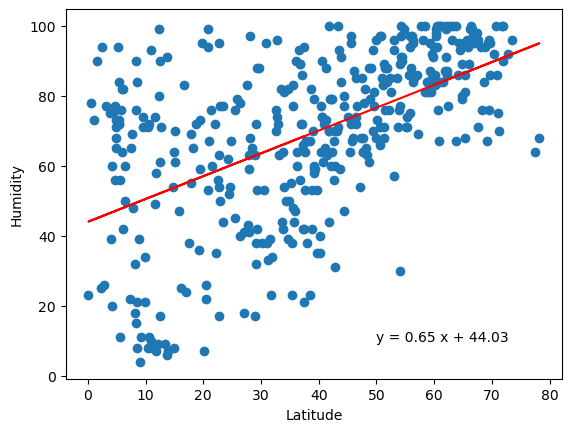

In [50]:
# Northern Hemisphere
linear_regression_pl(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], "Latitude","Humidity", (50,10))

The r-value is 0.03371635620572595


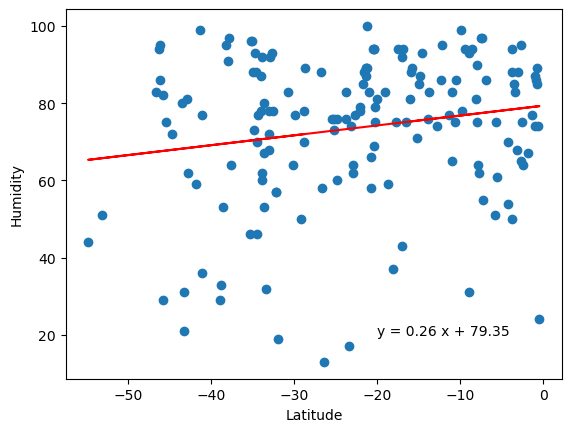

In [49]:
# Southern Hemisphere
linear_regression_pl(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], "Latitude","Humidity", (-20,20))

**Discussion about the linear relationship:  
Positive linear relationship latitude vs humidity in Northern and Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.042442138670603105


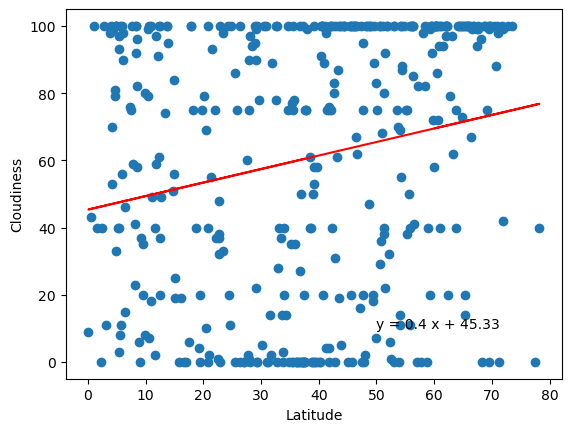

In [48]:
# Northern Hemisphere
linear_regression_pl(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], "Latitude","Cloudiness", (50,10))

The r-value is 0.09895701184907445


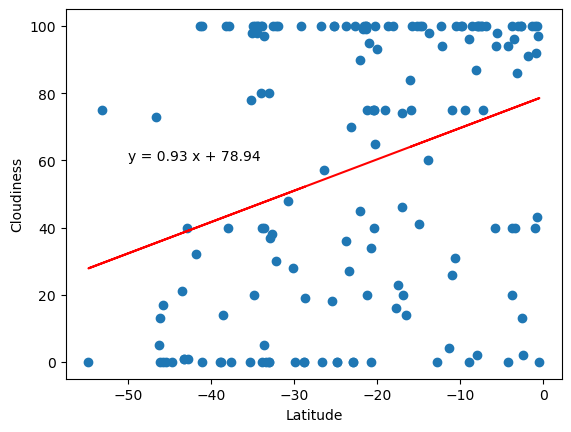

In [54]:
# Southern Hemisphere
linear_regression_pl(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], "Latitude","Cloudiness", (-50,60))

**Discussion about the linear relationship: Positive linear relationship latitude vs cloudiness in Southern and Northern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 1.3541336182551579e-05


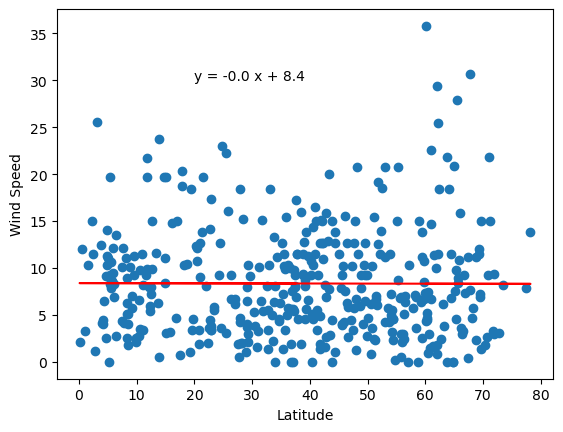

In [56]:
# Northern Hemisphere
linear_regression_pl(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], "Latitude","Wind Speed", (20,30))

The r-value is 0.04616776302913231


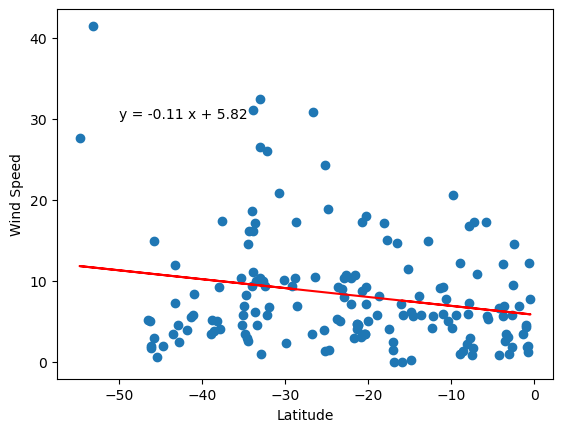

In [58]:
# Southern Hemisphere
linear_regression_pl(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], "Latitude","Wind Speed", (-50,30))

**Discussion about the linear relationship: Negative linear relationship latitude vs wind speed in North and South Hemisphere.